In [4]:
from resources import *

# Introduction
This notebook is meant as a companion to the paper "Balanced Hodge Laplacians optimize consensus over simplicial complexes" **[insert link here]**.  With the use of the Balanced Hodge Laplacian, we have developed the BHL-1 consensus algorithm.  This notebook allows you to create (or load preset) simplicial complexes (of dimension 2) and run the BHL-1 consensus on them.  Nearly all of the figure from the paper can be replicated here.  As written, this notebook will reproduce those plots exactly.  Feel free to try out the plots with different simplicial complexes.  The presetSC() function can create about 20 different simplicial complexes, and you can create your own as well. 

# Examples and Plots

We load in one of our preset simplicial complexes.  This could also be done manually, as shown in the following cell.

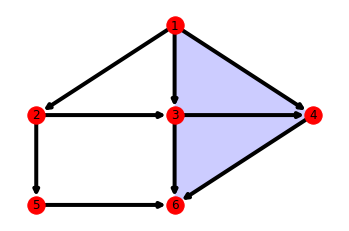

In [5]:
x = presetSC(13)
x.plotSimplicialComplex()

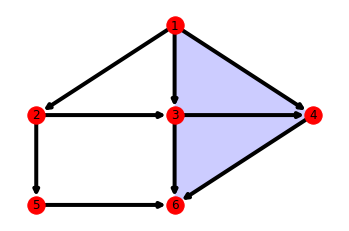

In [6]:
#number of nodes.  They will be automatically labeled, starting at 1
nodes  = 6 

#Edges and triangles as lists of tuples.  The order does not matter as they
# will automatically be sorted.
edges = [(1, 2), (1, 3), (1, 4), (2, 3),
         (2, 5), (3, 4), (3,6), (4, 6), (5, 6)]
triangles = [(1, 3, 4), (3, 4, 6)]

#The (x, y) positions of each node.  This is needed to plot the simplicial complexes.
# If you don't intend on plotting the simplicial complex, pos can be empty.
pos = {1: (1, 2),
       2: (0, 1),
       3: (1, 1), 
       4: (2, 1), 
       5: (0,0),
       6: (1, 0)}
x = simplicialComplex(nodes, edges, triangles, pos)
x.plotSimplicialComplex()

The following cell runs consensus simulation using BHL-1 and the given balancing parameter alpha.  It then plots the Hodge decomposition projections onto the simplicial complex for the given time increments, which default to 0, 50, and 500. 

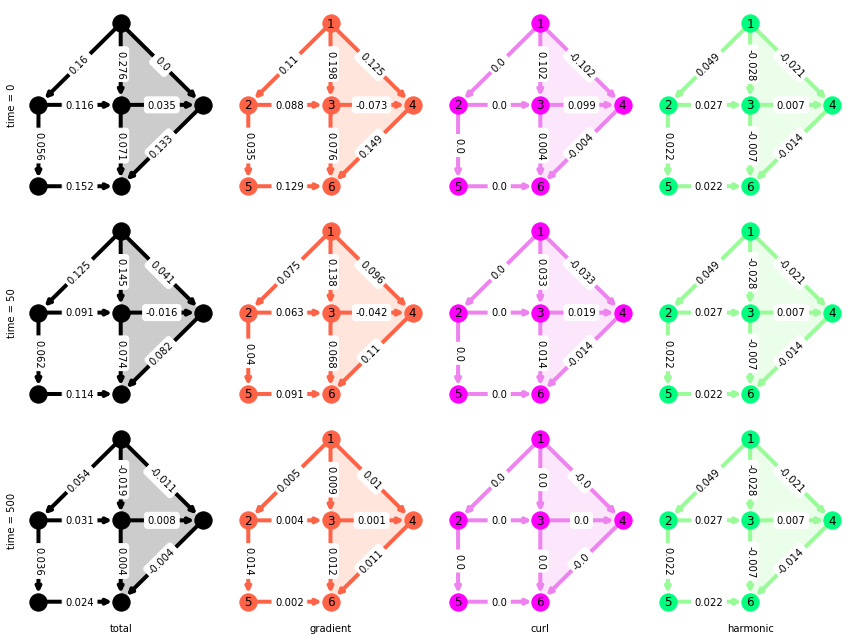

In [7]:
consensusOnSCPlot(x, alpha=.2, times=(0, 50, 500))

Next, we can look at the convergence across the Hodge decomposition not just a few time steps, but at all of them.  Each line in the plots corresponds to one edge in the simplicial complex.

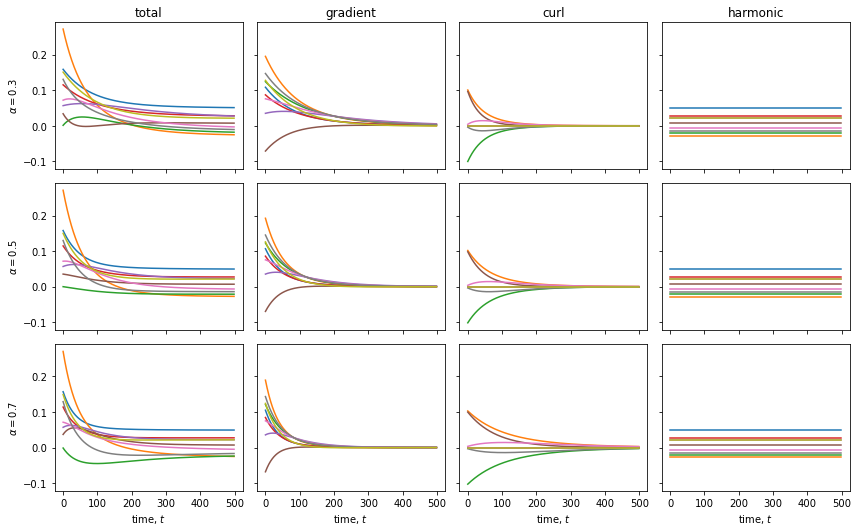

In [8]:
#Time values plotted
xrange = np.arange(1,500)

#Balancing parameters to be tested
alphas = (.3, .5, .7)

timeSeriesFigure(x, alphas, xrange)

Instead of looking directly at the simulation for one balancing parameter, we can see how the gradient and curl subspaces converge for many different balancing parameters.  These are then compared with the theoretical values calculated with the eigenvalues of the components of the Balanced Hodge Laplacian.

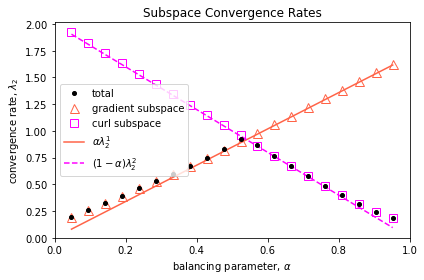

In [9]:
subspaceConvergencePlot(x)

With the same plot, we can also look at a few specific balancing parameter values and see how these two subspaces converge compared to each other.

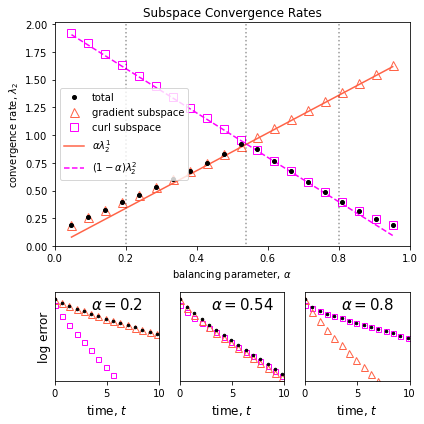

In [10]:
subspaceConvergencePlotWithExamples(x)

Next we will look at multiple different simplicial complexes, all with the same nodes and edges, but different triangles.  The gradient subspace will act the same for these, but their curl subspaces will converge differently during BHL-1 consensus.  Because of this, their optimal balancing parameters will also be different.  Feel free to play around with this one, as presetSC(index) has the same 2-skeleton for 100 < index < 111.

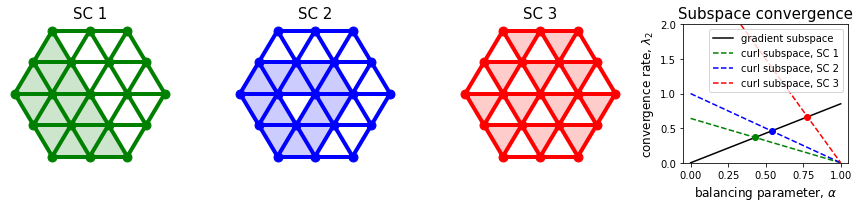

In [11]:
similarSCPlot([presetSC(106), presetSC(105), presetSC(104)])

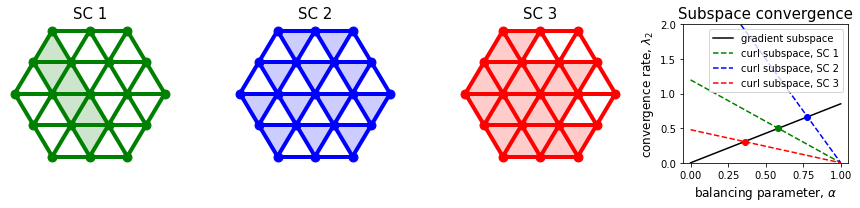

In [12]:
similarSCPlot([presetSC(102), presetSC(104), presetSC(108)])

Looking at the bigger picture, we can consider many different simplicial complexes, not all with the same 2-skeleton, and see both their optimal balancing parameters and convergence rates.

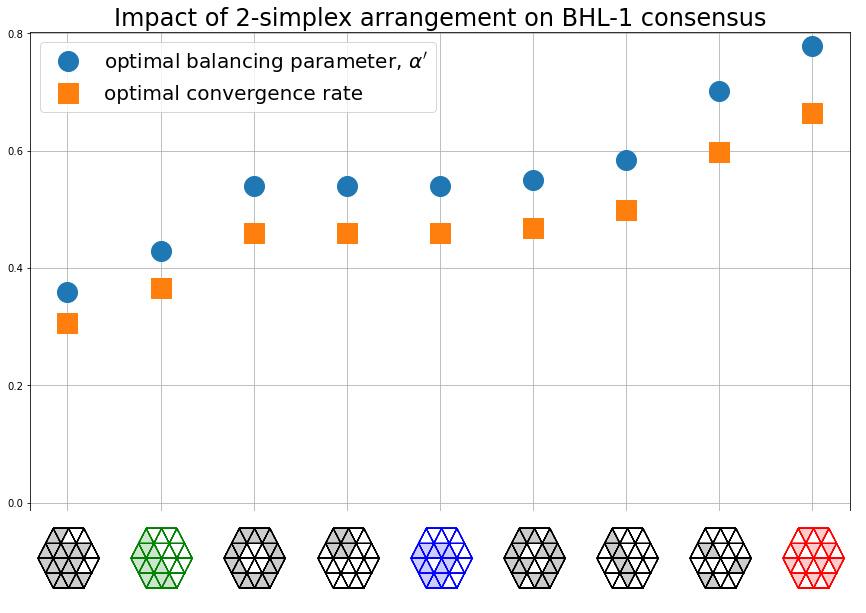

In [13]:
colors = ['black', 'black','black','red', 'blue', 'green', 'black','black','black', 'black']
simplicialComplexes = [presetSC(i) for i in range(101, 110)]
optAlphaPlot(simplicialComplexes, colors)